<a href="https://colab.research.google.com/github/LiyaUnknown/MobileNet_V2/blob/main/MoileNet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

keras = tf.keras

In [81]:
# loading the data
tfds.disable_progress_bar()

(train_ , vallidation_ , test_) , info = tfds.load('cats_vs_dogs' , split = ['train[:80%]' , 'train[80%:90]' , 'train[90%:]'] , with_info = True , as_supervised=True)

In [82]:
# let's look at the data 

total_train = 0
total_vall = 0
total_test = 0

for a in train_ : 
    total_train += 1


for a in vallidation_ : 
    total_vall += 1


for a in test_ : 
    total_test += 1

In [83]:
print(f'{total_train} train images about cats and dog')

print(f'{total_vall} vallidation images about cats and dog')

print(f'{total_test} test images about cats and dog')

18610 train images about cats and dog
2326 vallidation images about cats and dog
2326 test images about cats and dog


In [84]:
label = info.features['label'].names

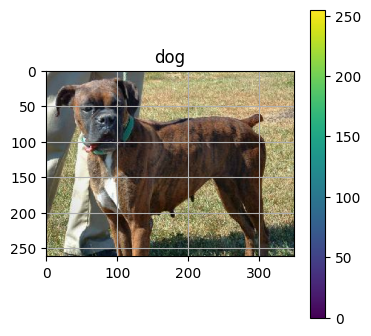

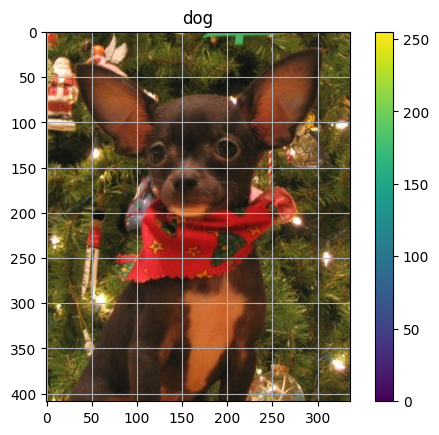

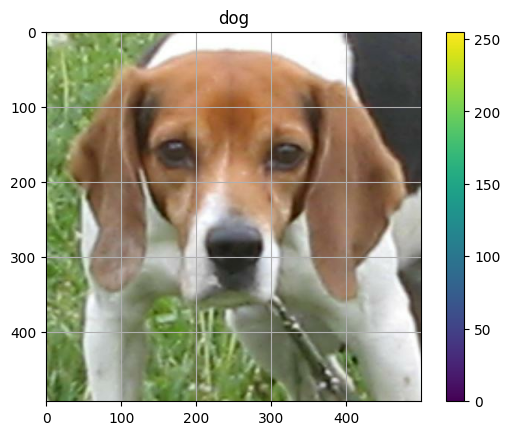

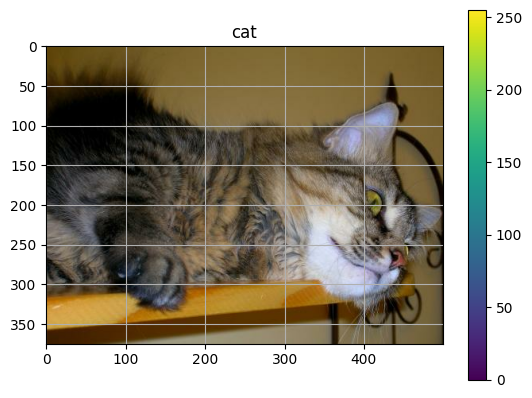

In [85]:
# let's look at the images

plt.figure(figsize = (4,4))
for image , lbl in train_.take(4) : 
    
    plt.imshow(image)
    plt.title(label[lbl])
    plt.colorbar()
    plt.grid(True)

    plt.show()

In [86]:
def formating(img , lbl) : 
    img_size = 150
    img = tf.cast(img , tf.float32) / 255.0
    img = tf.image.resize(img , (img_size , img_size))

    return img , lbl
batch_size = 32
train_ = train_.map(formating)
vallidation_ = vallidation_.map(formating)
test_ = test_.map(formating)

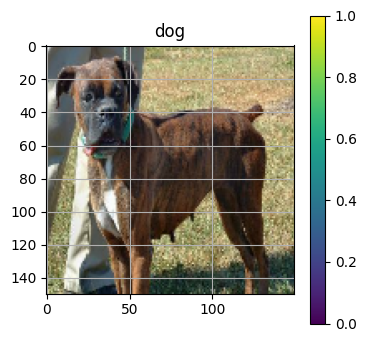

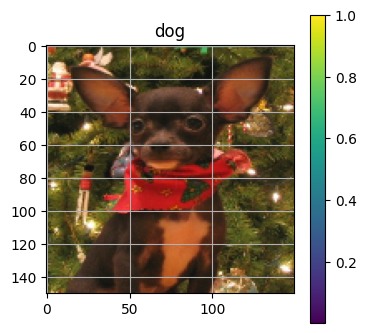

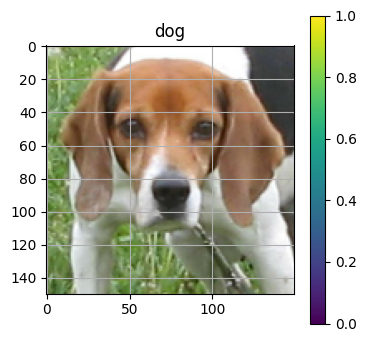

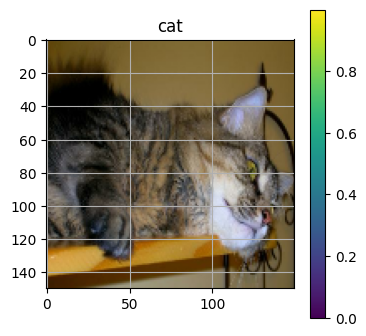

In [87]:
# let's look at the images

for image , lbl in train_.take(4) : 
    plt.figure(figsize = (4,4))
    plt.imshow(image)
    plt.title(label[lbl])
    plt.colorbar()
    plt.grid(True)

    plt.show()

In [88]:
# making better data

shuffle = 1000
batches = 32

train_ = train_.shuffle(shuffle).batch(batches)
vallidation_ = vallidation_.shuffle(shuffle).batch(batches)
test_ = test_.batch(batches)

In [89]:
# making our model with mobilnet v2 

base_layer = keras.applications.MobileNetV2(input_shape = (150,150,3) , weights = 'imagenet' , include_top=False)
avarage_pool = keras.layers.GlobalAveragePooling2D()
predition_layer = keras.layers.Dense(1)

base_layer.trainable = False

In [90]:
base_layer.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

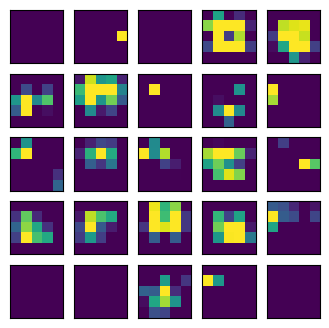

In [91]:
for image , _ in train_.take(1) : 
    pass

plt.figure(figsize = (4 , 4))

for value in range(25) : 
    plt.subplot(5,5,value+1)
    plt.imshow(base_layer(image)[0][: , : , value])
    plt.xticks([])
    plt.yticks([])

plt.show()
     

In [92]:
# base model

model = keras.Sequential([
    base_layer , 
    avarage_pool , 
    predition_layer
])


In [93]:
model(image)

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[ 0.37686217],
       [-1.9968928 ],
       [ 0.24750662],
       [ 1.767068  ],
       [-0.7440899 ],
       [-0.09612751],
       [-1.8874868 ],
       [ 0.7603739 ],
       [ 1.2927654 ],
       [ 0.09610194],
       [-1.1421928 ],
       [ 0.4210677 ],
       [-1.2659047 ],
       [ 0.17883658],
       [ 0.5223129 ],
       [-0.7108102 ],
       [ 2.0087004 ],
       [ 0.6187744 ],
       [ 0.89591724],
       [ 2.6058538 ],
       [-0.18841809],
       [ 2.0371363 ],
       [-0.07158184],
       [-0.72820586],
       [-0.34760356],
       [ 0.01685357],
       [-0.53655165],
       [-0.29499963],
       [ 0.71240497],
       [ 0.08274442],
       [ 0.0220511 ],
       [ 1.0540683 ]], dtype=float32)>

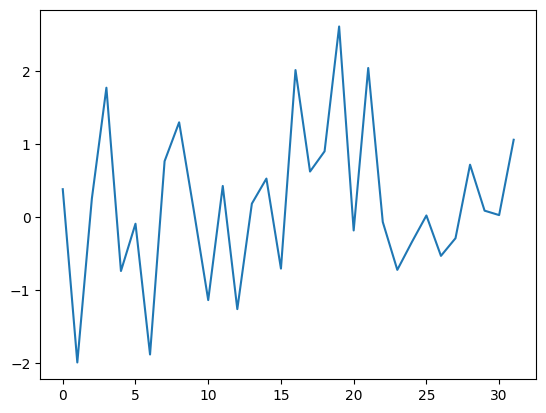

In [94]:
plt.plot(model(image))

plt.show()

In [95]:

lrt = 0.0001
op = keras.optimizers.RMSprop(lr = lrt)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer = op , loss = loss , metrics = ['accuracy'])

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [97]:
model.fit(train_ , epochs=3 , validation_data = (vallidation_))

Epoch 1/3
582/582 [==============================] - 44s 68ms/step - loss: 0.1139 - accuracy: 0.9538 - val_loss: 0.0900 - val_accuracy: 0.9682
Epoch 2/3
582/582 [==============================] - 41s 67ms/step - loss: 0.0866 - accuracy: 0.9661 - val_loss: 0.0865 - val_accuracy: 0.9669
Epoch 3/3
582/582 [==============================] - 40s 67ms/step - loss: 0.0794 - accuracy: 0.9671 - val_loss: 0.0869 - val_accuracy: 0.9665


In [98]:
model.save('cats&dogs.h5')

In [99]:
loaded_model = keras.models.load_model('/content/cats&dogs.h5')

In [100]:
loaded_model.evaluate(test_)

73/73 [==============================] - 5s 51ms/step - loss: 0.0812 - accuracy: 0.9673


[0.08119121193885803, 0.9673258662223816]

In [147]:
plt.figure(figsize = (4,4))

for image , _ in test_.take(90) : 
    pass


<Figure size 400x400 with 0 Axes>

In [148]:
print(_)

tf.Tensor([1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0], shape=(22,), dtype=int64)


1/1 [==============================] - 0s 31ms/step


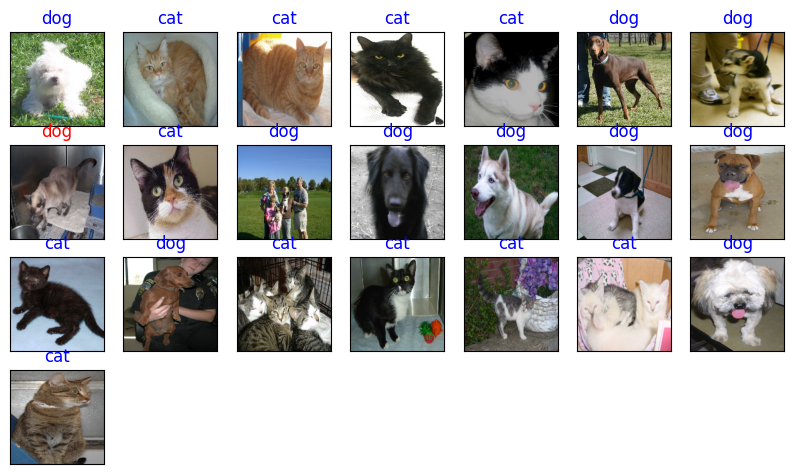

In [149]:
pre = loaded_model.predict(image)

plt.figure(figsize = (10 , 10))
j = None
for value in enumerate(pre) : 
    plt.subplot(7,7,value[0]+1)
    plt.imshow(image[value[0]])
    plt.xticks([])
    plt.yticks([])
    if value[1] > pre.mean() :
        j = 1
        color = 'blue' if j == _[value[0]] else 'red'
        plt.title('dog' , color = color)
    else : 
        j = 0
        color = 'blue' if j == _[value[0]] else 'red'
        plt.title('cat' , color = color)

plt.show()